In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn pymysql


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

df = pd.read_csv("/Users/poojaajay/Downloads/saas_churn_dataset.csv")
df.head()


,customer_id,company_size,industry,region,signup_date,plan_type,contract_type,monthly_revenue,tenure_months,churned,cancel_date,avg_monthly_logins,avg_session_minutes,feature_usage_score,support_ticket_count,avg_resolution_hours
0,C00001,SMB,Retail,US,2022-03-13,Basic,Monthly,29,19,1,2023-10-04 00:00:00,4,9,13,5,45
1,C00002,SMB,Healthcare,APAC,2023-01-21,Basic,Monthly,29,21,0,NaN,19,26,64,0,13
2,C00003,SMB,Healthcare,US,2022-07-09,Basic,Monthly,29,3,0,NaN,16,23,78,1,7
3,C00004,Enterprise,Marketing,US,2022-12-12,Enterprise,Monthly,149,20,0,NaN,21,21,83,0,11
4,C00005,SMB,Tech,US,2023-01-23,Basic,Monthly,29,6,1,2023-07-22 00:00:00,5,10,27,4,67


In [9]:
df.shape


(5000, 16)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           5000 non-null   object
 1   company_size          5000 non-null   object
 2   industry              5000 non-null   object
 3   region                5000 non-null   object
 4   signup_date           5000 non-null   object
 5   plan_type             5000 non-null   object
 6   contract_type         5000 non-null   object
 7   monthly_revenue       5000 non-null   int64 
 8   tenure_months         5000 non-null   int64 
 9   churned               5000 non-null   int64 
 10  cancel_date           1350 non-null   object
 11  avg_monthly_logins    5000 non-null   int64 
 12  avg_session_minutes   5000 non-null   int64 
 13  feature_usage_score   5000 non-null   int64 
 14  support_ticket_count  5000 non-null   int64 
 15  avg_resolution_hours  5000 non-null   

In [11]:
df['churned'].value_counts(normalize=True)


churned
0    0.73
1    0.27
Name: proportion, dtype: float64

In [13]:
features = [
    'monthly_revenue',
    'tenure_months',
    'avg_monthly_logins',
    'avg_session_minutes',
    'feature_usage_score',
    'support_ticket_count',
    'avg_resolution_hours'
]

X = df[features]
y = df['churned']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 3))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00       405

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

ROC AUC: 1.0


In [18]:
import pandas as pd

importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

importance


,feature,coefficient
6,avg_resolution_hours,0.627491
5,support_ticket_count,0.207283
1,tenure_months,0.024391
0,monthly_revenue,-0.001252
3,avg_session_minutes,-0.256335
2,avg_monthly_logins,-0.284500
4,feature_usage_score,-0.286934


In [19]:
import pandas as pd

importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

importance


,feature,coefficient
6,avg_resolution_hours,0.627491
5,support_ticket_count,0.207283
1,tenure_months,0.024391
0,monthly_revenue,-0.001252
3,avg_session_minutes,-0.256335
2,avg_monthly_logins,-0.284500
4,feature_usage_score,-0.286934


In [20]:
df['churn_probability'] = model.predict_proba(X)[:,1]

df[['customer_id', 'churn_probability']].sort_values(
    by='churn_probability',
    ascending=False
).head(10)


,customer_id,churn_probability
1305,C01306,1.0
1659,C01660,1.0
3850,C03851,1.0
518,C00519,1.0
1152,C01153,1.0
4832,C04833,1.0
1600,C01601,1.0
1141,C01142,1.0
939,C00940,1.0
375,C00376,1.0


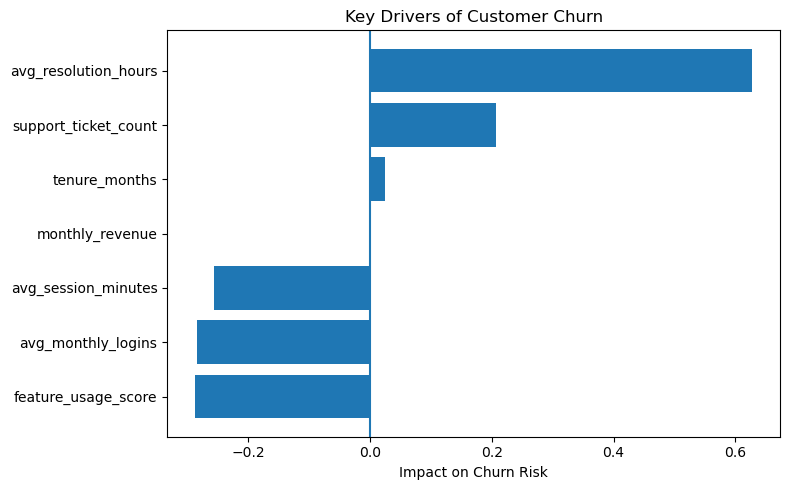

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Create feature importance dataframe
importance = pd.DataFrame({
    'Feature': features,
    'Impact': model.coef_[0]
}).sort_values(by='Impact')

# Plot
plt.figure(figsize=(8,5))
plt.barh(importance['Feature'], importance['Impact'])
plt.axvline(0)  # baseline
plt.title("Key Drivers of Customer Churn")
plt.xlabel("Impact on Churn Risk")
plt.ylabel("")

plt.tight_layout()
plt.show()
